# Analyse

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("dht.csv")
df.describe()

,id,Temp,Humidity,label
count,27299.000000,27299.000000,27299.000000,27299.000000
mean,13649.999853,22.628939,59.495366,2.355031
std,7880.686739,4.890451,26.574806,2.158163
min,1.000000,13.500000,6.000000,0.000000
25%,6825.500000,18.800000,37.000000,0.000000
50%,13650.000000,21.900000,61.000000,4.000000
75%,20474.500000,26.100000,86.000000,4.000000
max,27299.000000,46.500000,93.000000,6.000000


In [ ]:
df.head()

,id,Date,Time,Temp,Humidity,label
0,1,23-01-2021,13:59:44,25.6,63,0
1,2,23-01-2021,14:00:45,25.5,62,0
2,3,23-01-2021,14:01:46,25.2,60,0
3,4,23-01-2021,14:02:47,25.0,60,0
4,5,23-01-2021,14:03:48,24.8,60,0


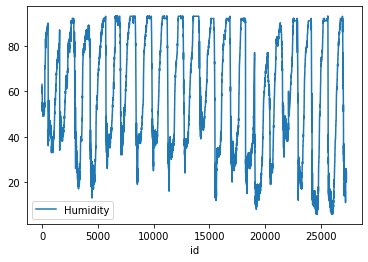

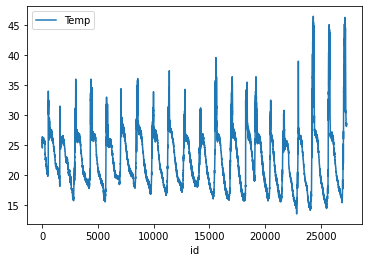

In [ ]:
df.plot(x='id',y='Humidity',kind='line')
df.plot(x='id',y='Temp',kind='line')

# Pre-Process

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Temp,Humidity,label
0,25.6,63,0
1,25.5,62,0
2,25.2,60,0
3,25.0,60,0
4,24.8,60,0


In [ ]:
target=df['label']
df.drop('label',axis=1,inplace=True)
features=df

In [ ]:
features

,Temp,Humidity
0,25.6,63
1,25.5,62
2,25.2,60
3,25.0,60
4,24.8,60
...,...,...
27294,28.5,21
27295,28.5,22
27296,28.5,24
27297,28.4,21


In [ ]:
target

0        0
1        0
2        0
3        0
4        0
        ..
27294    0
27295    0
27296    0
27297    0
27298    0
Name: label, Length: 27299, dtype: int64

# ML Model

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(features,target,random_state=42,shuffle=True,)
# by default --> training data = 70%

In [ ]:
X_train

,Temp,Humidity
2403,20.5,80
7886,20.7,92
8629,28.1,39
878,27.1,35
22300,19.1,63
...,...,...
21575,24.2,55
5390,18.4,88
860,27.3,33
15795,26.7,32


##1) KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn = knn.fit(X_train,Y_train)

In [ ]:
Y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8613919413919414

In [ ]:
knn.predict([[29,51]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

With  1  neighbors the acc is  0.8361904761904762
With  2  neighbors the acc is  0.8361904761904762
With  3  neighbors the acc is  0.853040293040293
With  4  neighbors the acc is  0.8565567765567765
With  5  neighbors the acc is  0.8613919413919414
With  6  neighbors the acc is  0.8621245421245421
With  7  neighbors the acc is  0.8627106227106227
With  8  neighbors the acc is  0.8657875457875458
With  9  neighbors the acc is  0.8647619047619047
With  10  neighbors the acc is  0.869010989010989
With  11  neighbors the acc is  0.8726739926739927
With  12  neighbors the acc is  0.8753113553113553
With  13  neighbors the acc is  0.8738461538461538
With  14  neighbors the acc is  0.8742857142857143
With  15  neighbors the acc is  0.8720879120879121
With  16  neighbors the acc is  0.8726739926739927
With  17  neighbors the acc is  0.8720879120879121
With  18  neighbors the acc is  0.8735531135531136
With  19  neighbors the acc is  0.8735531135531136
With  20  neighbors the acc is  0.87413919

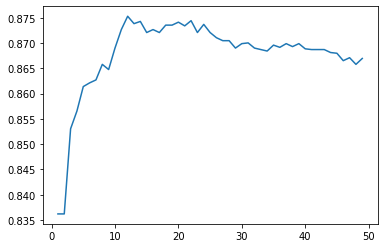

In [ ]:
acc=[]
xn=50
for n in range(1,xn):
    knn1 = KNeighborsClassifier(n_neighbors=n)
    knn1 = knn1.fit(X_train,Y_train)
    y_pred=knn1.predict(X_test)
    a= accuracy_score(Y_test,y_pred)
    acc.append(a)
    print('With ',n,' neighbors the acc is ',a)
plt.plot([a for a in range(1,xn)],acc)
print("\n",'The Max acc is achieved at neighbour:\n n=',(acc.index(max(acc))+1))

##2) Logistic Regression

In [ ]:
reg = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8455677655677656

In [ ]:
reg.predict([[29,51]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

##3) Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
Y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8531868131868132

In [ ]:
rf.predict([[29,51]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

With  1  depth of Random Forest the acc is  0.8524542124542125
With  2  depth of Random Forest the acc is  0.8531868131868132
With  3  depth of Random Forest the acc is  0.8531868131868132
With  4  depth of Random Forest the acc is  0.8606593406593407
With  5  depth of Random Forest the acc is  0.8641758241758242
With  6  depth of Random Forest the acc is  0.8666666666666667
With  7  depth of Random Forest the acc is  0.87003663003663
With  8  depth of Random Forest the acc is  0.8734065934065934
With  9  depth of Random Forest the acc is  0.8764835164835165
With  10  depth of Random Forest the acc is  0.877948717948718
With  11  depth of Random Forest the acc is  0.8776556776556776
With  12  depth of Random Forest the acc is  0.8776556776556776
With  13  depth of Random Forest the acc is  0.8764835164835165
With  14  depth of Random Forest the acc is  0.8764835164835165
With  15  depth of Random Forest the acc is  0.8754578754578755
With  16  depth of Random Forest the acc is  0.87589

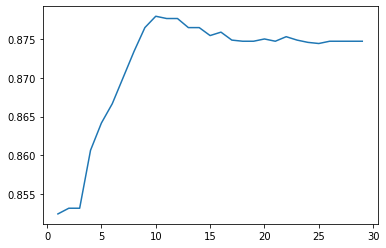

In [ ]:
acc=[]
xn=30
for n in range(1,xn):
    rf1 = RandomForestClassifier(max_depth=n, random_state=0)
    rf1 = rf1.fit(X_train,Y_train)
    y_pred=rf1.predict(X_test)
    a= accuracy_score(Y_test,y_pred)
    acc.append(a)
    print('With ',n,' depth of Random Forest the acc is ',a)
plt.plot([a for a in range(1,xn)],acc)
print("\n",'The Max acc is achieved at depth:\n n=',(acc.index(max(acc))+1))